In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sqlalchemy import create_engine


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

19.2 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


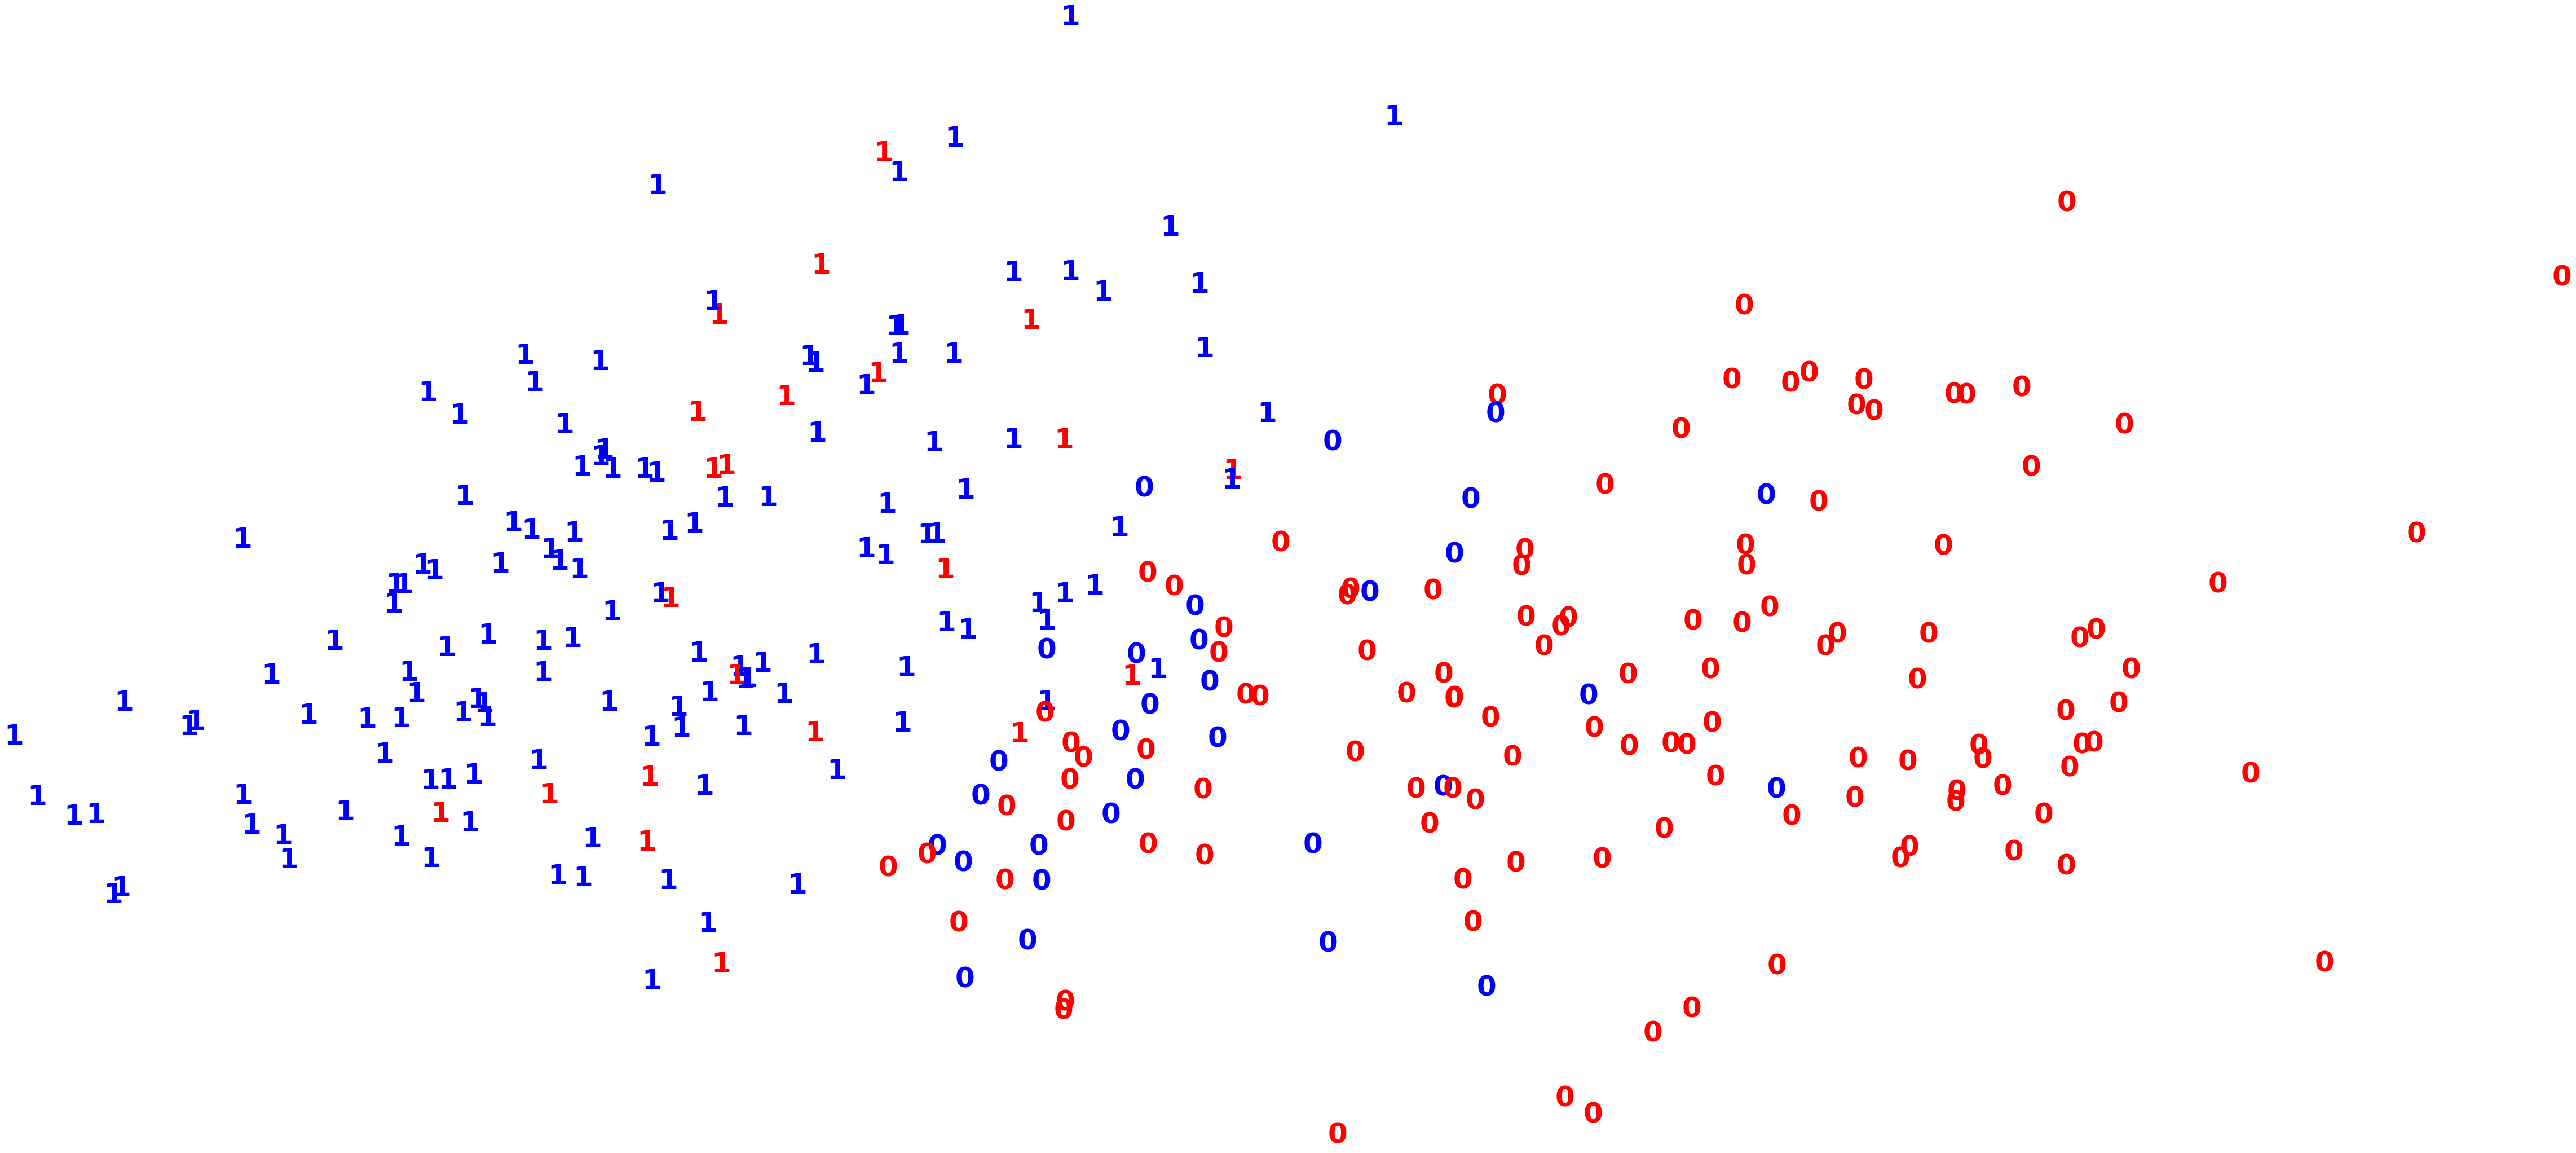

In [4]:
pca = PCA(n_components=5).fit_transform(X_std)
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=15)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [7]:
print(y)
print(minikmeans_cluster)

[1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 1]
[0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 

In [8]:
sum(1 for x,y in zip(y,minikmeans_cluster) if x == y) / len(y)


0.8250825082508251

19.8 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


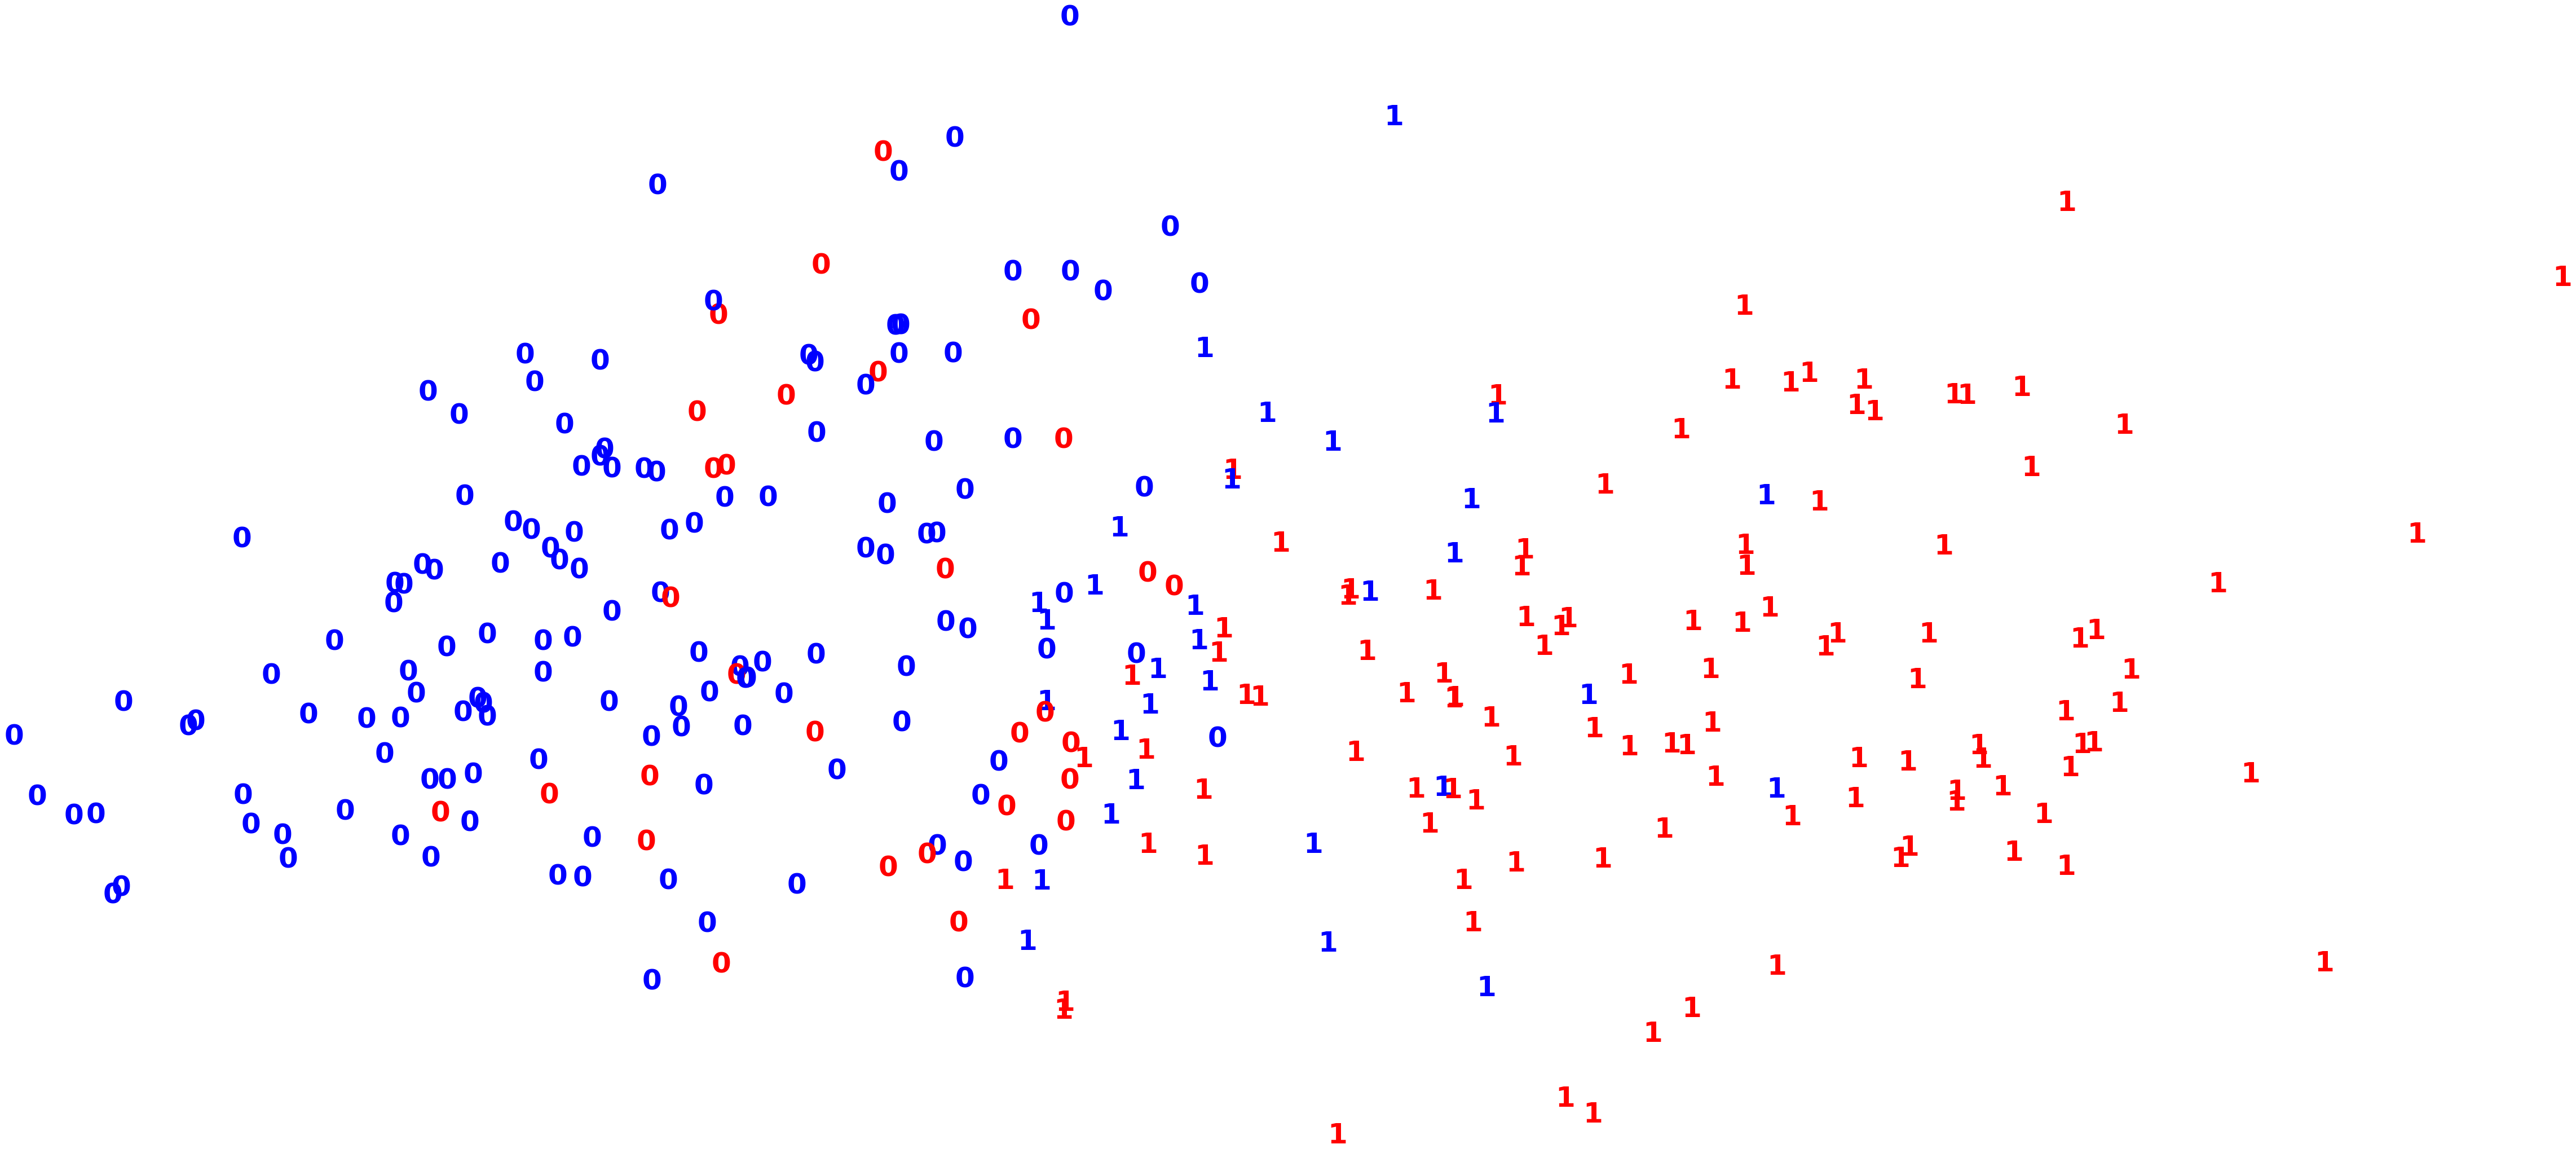

In [15]:
pca = PCA(n_components=3).fit_transform(X_std)
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=15)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [14]:
sum(1 for x,y in zip(y,minikmeans_cluster) if x == y) / len(y)


0.8151815181518152